In [ ]:
! pip install pandas seaborn matplotlib scikit-learn pyarrow fastparquet

In [ ]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
dim_initial,nb_cols= df.shape

# Question 1
print("Q1 - number of columns",nb_cols)
# print("columns names", list(df.columns))
# compute duration in minutes
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

# question 2
print("Q2 - standart deviation" , df.duration.std(), df.shape)
# filtering
df= df[(df.duration >= 1) & (df.duration <= 60)]


print("     standart deviation after filtering", df.duration.std(),df.shape)

# question 3
dim_filtered,_=df.shape
Q3=1-(dim_initial-dim_filtered)/dim_initial
print("Q3 - % of outliers", Q3)

Q1 - number of columns 19
Q2 - standart deviation 42.59435124195458 (3066766, 20)
     standart deviation after filtering 9.939385620151036 (3009173, 20)
Q3 - % of outliers 0.9812202822125979


In [ ]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
df[categorical] = df[categorical].astype(str)

train_dicts = df[categorical + numerical].to_dict(orient='records')
print(type(train_dicts), train_dicts[0:1])

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
# question5
print("Q4 - ", X_train.shape)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)
# question 5
print("Q5 - ", mean_squared_error(y_train, y_pred, squared=False))

<class 'list'> [{'PULocationID': '161', 'DOLocationID': '141', 'trip_distance': 0.97}]
Q4 -  (3009173, 516)
Q5 -  7.656752063242953


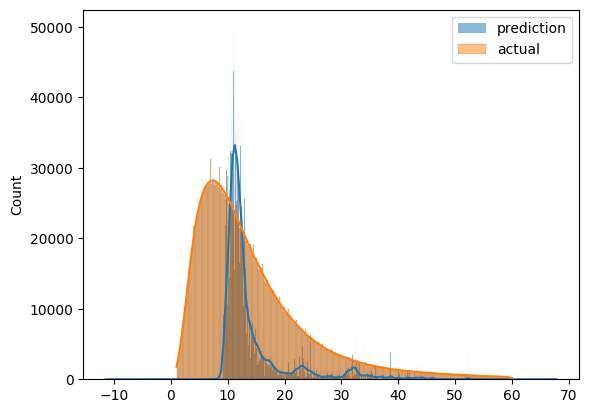

In [ ]:
sns.histplot(y_pred, label='prediction',kde=True)
sns.histplot(y_train, label='actual',kde=True)
plt.legend()

TRAINNING

In [ ]:
def read_dataframe(filename):

    if filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df


In [ ]:
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
(len(df_train), len(df_val))

(3009173, 2855951)

In [ ]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [ ]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [ ]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

5.244464784440393